You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

## Load Dataset and Split

In [2]:
import numpy as np
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [3]:
import numpy as np
#Split Data
from sklearn.model_selection import train_test_split
trainX , testX, trainy, testy = train_test_split(x_l, y_l, test_size = 0.3)

## Logistic Regression Implementation

In [4]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

def findAccuracy(testy,predy):
    y=np.argmax(testy, axis=1)
    score=accuracy_score(y, predy)
    print(f'accuracy_score: {score}')
    score=r2_score(y, predy)
    print(f'r2_score: {score}')
    score=confusion_matrix(y, predy)
    print(f'confusion_matrix:\n{score}')

class logReg(object):
    def __init__(self, lr=0.05, epochs=10000, method='ovr'):
        self.lr=lr
        self.epochs=epochs
        self.method=method
    
    def initialize_w(self, rows, cols):
        w = np.zeros([rows, cols])
        return w
    
    def train_ovo(self, trainX, trainy):
        self.trainy=trainy.copy()
        self.trainX=trainX.copy()
        self.trainX=self.trainX.reshape(self.trainX.shape[0], -1)

        sizeOfTrain, features=np.shape(self.trainX)
        classes=self.trainy.shape[1]
        numModels=int(classes*(classes-1)/2)
        self.w = np.zeros((features,0))     #shape of w = (cols in trainX) X (classes)
        self.bias=np.zeros((1,0))
        
        for outer in range(classes):
            for inner in range(outer+1, classes):
                costLst=[]
                w = np.random.rand(features,1)     #shape of w = (cols in trainX) X (1)
                bias=np.zeros((1,1))
                selectedIdx1=list(self.trainy[:,outer].astype('int')==1)
                selectedIdx2=list(self.trainy[:,inner].astype('int')==1)
                selectedIdx=list(map(lambda a,b: a|b, selectedIdx1, selectedIdx2))

                groupX=self.trainX[selectedIdx, :]
                groupy=self.trainy[selectedIdx, outer].reshape(-1,1)

                rows=np.shape(groupX)[0]

                for iter in range(1,self.epochs+1):
                    y_pred=np.dot(groupX,w)+bias         #shape of z = (rows in trainX) X (1) - same as shape of trainy
                    y_pred=1/(1+np.exp(-y_pred))

                    cost1=groupy*np.log(y_pred)   #rows=number of classes, cols=1
                    cost2=(1-groupy)*np.log(1-y_pred)
                    cost=-np.sum(cost1 + cost2)/rows
                    costLst.append(cost)
                    dw=np.dot(groupX.T, (y_pred-groupy))
                    dw/=rows
                    db=np.sum(y_pred-groupy)
                    db/=rows
                    w=w-self.lr*dw
                    bias=bias-self.lr*db
#                     if(cost<0.09):
#                         print("line 51: ",cost)
#                         break
                    if(iter>2 and abs(costLst[-2]-cost)<0.00001 and abs(costLst[-3]-cost)<0.00001):
#                         print(cost)
                        break
#                     if(iter%500==0):
#                         print(cost)
                self.w=np.append(self.w, w, axis=1)
                self.bias=np.append(self.bias, bias, axis=1)

    def test_ovo(self, testX):
        self.testX=testX.copy()
        self.testX=self.testX.reshape(self.testX.shape[0], -1)

        classes=np.shape(self.trainy)[1]
        arr=np.zeros((1,classes))
        self.predy=np.empty((0,classes))

        predy=np.dot(self.testX,self.w)+self.bias
        predy=1/(1+np.exp(-predy))        

        for i in range(np.shape(self.testX)[0]):
            for outer in range(classes):
                for inner in range(outer+1, classes):
                    col=int(outer*(classes-outer)+int(outer*(outer-1)/2)+(inner-outer-1))
                    if(predy[i,col]>=0.5):
                        arr[0,outer]+=1
                    else:
                        arr[0,inner]+=1
            self.predy=np.append(self.predy, arr, axis=0)
            arr.fill(0)
        self.predy=np.argmax(self.predy, axis=1)
            
    def train_ovr(self, trainX, trainy):
        self.trainy=trainy.copy()
        self.trainX=trainX.copy()
        self.trainX=self.trainX.reshape(self.trainX.shape[0], -1)

        rows, cols=np.shape(self.trainX)

        self.w = np.zeros((cols,self.trainy.shape[1]))     #shape of w = (cols in trainX) X (classes)
        self.bias=np.zeros((1,self.trainy.shape[1]))

        #Train for each class once
        for col in range(np.shape(self.trainy)[1]):
            costLst=[]
            w = self.w[:,col]     #shape of w = (cols in trainX) X (1)
            bias=self.bias[:,col]
            for iter in range(1,self.epochs+1):
                y_pred=np.dot(self.trainX,w)+bias         #shape of z = (rows in trainX) X (1) - same as shape of trainy
                y_pred=1/(1+np.exp(-y_pred))
                cost1=self.trainy[:,col]*np.log(y_pred)   #rows=number of classes, cols=1
                cost2=(1-self.trainy[:,col])*np.log(1-y_pred)
                cost=-np.sum(cost1 + cost2)/rows
                costLst.append(cost)
                dw=np.dot(self.trainX.T, (y_pred-self.trainy[:,col]))
                dw/=rows
                db=np.sum(y_pred-self.trainy[:,col])
                db/=rows
                w=w-self.lr*dw
                bias=bias-self.lr*db
                if(cost<0.12):
#                     print("line 51: ",cost)
                    break
                if(iter>2 and abs(costLst[-2]-cost)<0.0001 and abs(costLst[-3]-cost)<0.0001):
#                     print("line 54: ",cost)
                    break
#                 if(iter%500==0):
#                     print(cost)
            self.w[:,col]=w
            self.bias[:,col]=bias
#         print(np.shape(self.w))
#         print(np.shape(self.bias))

    def test_ovr(self, testX):
        self.testX=testX.copy()
        self.testX=self.testX.reshape(self.testX.shape[0], -1)
        predy=np.dot(self.testX,self.w)+self.bias
        self.predy=1/(1+np.exp(-predy))      
        self.predy=np.argmax(self.predy, axis=1)
        
    def train(self, trainX, trainy):
        if(self.method=='ovo'):
            self.train_ovo(trainX, trainy)
        elif(self.method=='ovr'):
            self.train_ovr(trainX, trainy)

    def test(self, testX):
        if(self.method=='ovo'):
            self.test_ovo(testX)
        elif(self.method=='ovr'):
            self.test_ovr(testX)
        return self.predy

### Classification with One vs Rest

In [49]:
logr=logReg(method='ovr')
logr.train(trainX, trainy)
predy=logr.test(testX)
findAccuracy(testy,predy)

accuracy_score: 0.678513731825525
r2_score: 0.20792007494181386
confusion_matrix:
[[55  1  0  1  2  1  5  0  1  4]
 [ 1 48  0  4  4  0  5  0  0  0]
 [ 0  3 36  2  2  1  3  0  8  1]
 [ 3  2  1 42  2  0  8  0 14  1]
 [ 0  2  1  1 58  2  0  0  3  0]
 [ 8  2  5  2  9 27  1  0  0  2]
 [ 3  7  7 10  0  0 35  0  3  2]
 [ 2  1  1  0  5  0  0 40  3  8]
 [ 0  2  7  1  8  0  0  0 32  0]
 [ 6  1  0  0  1  0  3  0  0 47]]


### Classification with One vs One

In [5]:
logr=logReg(method='ovo')
logr.train(trainX, trainy)
predy=logr.test(testX)
findAccuracy(testy,predy)

<ipython-input-4-73c5abedf0fb>:64: RuntimeWarning: divide by zero encountered in log
  cost2=(1-groupy)*np.log(1-y_pred)
<ipython-input-4-73c5abedf0fb>:64: RuntimeWarning: invalid value encountered in multiply
  cost2=(1-groupy)*np.log(1-y_pred)


accuracy_score: 0.7802907915993538
r2_score: 0.4642823127984066
confusion_matrix:
[[62  2  1  0  0  3  0  0  0  2]
 [ 1 58  0  1  1  0  0  0  0  0]
 [ 0  2 42  0  3  1  5  1  2  0]
 [ 0  0  3 46  0  1  4  0  8  1]
 [ 0  4  5  0 38  4  0  1  1  0]
 [ 3  0  4  0  0 42  4  0  0  1]
 [ 3  1  8  9  0  3 30  0  0  1]
 [ 6  1  1  0  2  0  0 56  1  2]
 [ 2  2  6  1  4  0  0  1 55  0]
 [ 6  2  1  0  0  1  3  0  0 54]]


### Bonus Part: Pictures with Predicted and Original Labels

The predicted and true labels differ for some of the images since the model's accuracy is not 100%

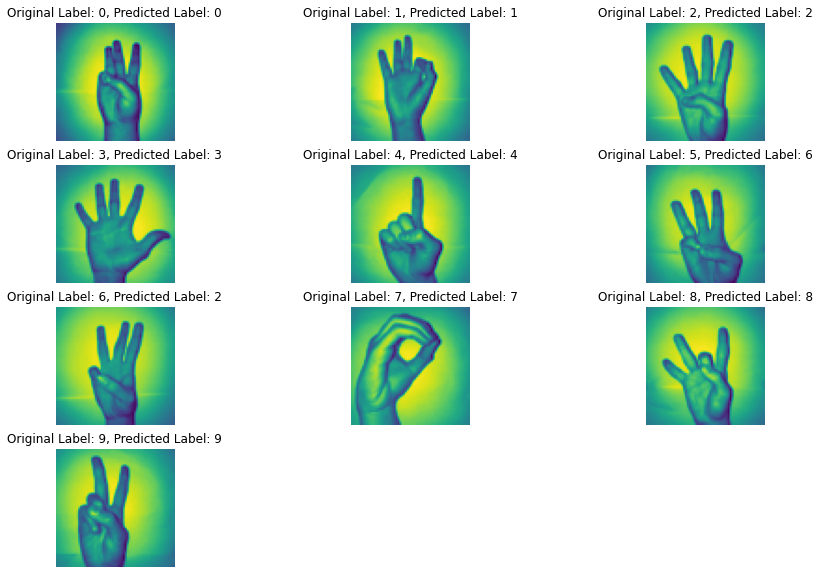

In [25]:
from matplotlib import pyplot as plt
    
y=np.argmax(testy,axis=1)
selectedIdx=np.unique(y,return_index=True)[1]
count=0
plt.figure(figsize=(15, 10))
for i in selectedIdx:
    count+=1
    plt.subplot(4,3,count)
    plt.axis('off')
    plt.imshow(trainX[i])
    plt.title(f'Original Label: {y[i]}, Predicted Label: {predy[i]}')
plt.show()

## Sklearn One vs Rest Classifier

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

y=np.argmax(trainy, axis=1)
X=trainX.reshape(np.shape(trainX)[0],-1)

clf = OneVsRestClassifier(SVC()).fit(X,y)

X=testX.reshape(np.shape(testX)[0],-1)
predy=clf.predict(X)
y=np.argmax(testy, axis=1)

findAccuracy(y,predy)

accuracy_score: 0.7835218093699515
r2_score: 0.5275417604244127
confusion_matrix:
[[61  1  0  0  1  3  1  1  0  2]
 [ 1 57  0  1  3  0  0  0  0  0]
 [ 0  1 41  1  1  3  1  0  7  1]
 [ 1  2  2 54  1  3  0  1  9  0]
 [ 0  3  0  0 60  2  0  1  1  0]
 [ 6  2  3  0  2 41  0  0  1  1]
 [ 4  5  7  6  0  4 36  0  2  3]
 [ 1  0  1  0  2  0  0 50  3  3]
 [ 0  1  3  2  7  1  0  4 32  0]
 [ 2  0  0  0  0  0  0  3  0 53]]


## Sklearn One vs One Classifier

In [16]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

y=np.argmax(trainy, axis=1)
X=trainX.reshape(np.shape(trainX)[0],-1)

clf = OneVsOneClassifier(LinearSVC(max_iter=10000,random_state=0)).fit(X, y)

X=testX.reshape(np.shape(testX)[0],-1)
predy=clf.predict(X)
y=np.argmax(testy, axis=1)

findAccuracy(y,predy)

accuracy_score: 0.8190630048465266
r2_score: 0.580546354151577
confusion_matrix:
[[59  2  1  0  1  0  3  2  0  2]
 [ 0 55  1  1  3  0  2  0  0  0]
 [ 0  1 41  0  1  2  5  0  6  0]
 [ 0  0  1 59  1  2  5  0  5  0]
 [ 0  1  0  0 61  2  1  1  1  0]
 [ 2  1  3  1  1 43  3  0  0  2]
 [ 2  3  7  5  0  1 46  0  0  3]
 [ 1  0  0  1  0  0  0 53  4  1]
 [ 0  0  6  2  1  0  0  1 40  0]
 [ 3  0  0  0  0  0  2  3  0 50]]


## Comparision between different Classifiers
The one vs one classifier gives better accuracy than the one vs rest classifier - for both the inbuilt function and the function implemented by us.

But since the one vs one classifier trains more number of classifiers, it is a little slow compared to the one vs rest classifier.

The accuracies of all the models is as below:
- Self-implemented ovo: 0.78
- Self-implemented ovr: 0.68
- Sklearn ovo: 0.82
- Sklearn ovr: 0.78

## Plot Sigmoid Function

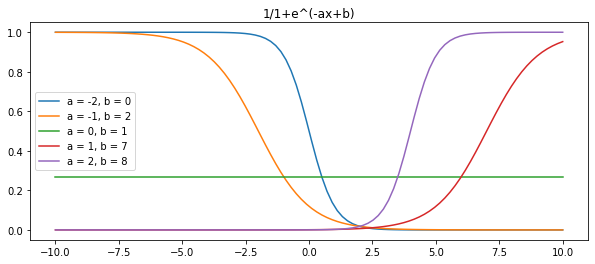

In [41]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 4))

for k in range(-2,3):
    xLst=[]
    yLst=[]
    b=np.random.randint(10)
    for x in np.linspace(-10, 10, 100):
        xLst.append(x)
        y=1/(1+np.exp(-k*x+b))
        yLst.append(y)
    plt.plot(xLst, yLst, label='a = %d, b = %d' %(k, b))
    plt.legend()

plt.title('1/1+e^(-ax+b)')
plt.show()

### Sigmoid for Multiclass Classification
For binary classification, we just need 1 sigmoid function which classifies a datapoint as belonging to either of the 2 classes.

For multiclass classification, we create $n\choose 2$ sigmoid functions, wherein each sigmoid function predicts the class a datapoint may belong to out of 2 classes. The class which gets maximum number of votes after running all the sigmoids for a datapoint is the predicted class for that datapoint